# Preprocessing Data

In [4]:
import pandas as pd
import numpy as np

In [5]:
data_path = "../data/raw-dataset.xlsx"
dataset = pd.read_excel(data_path)
dataset.head()

,category,email
0,where_is_my_order,"Hello, just checking in on the status of my or..."
1,where_is_my_order,It's getting frustrating not knowing where my ...
2,other,"Hi there, I am organizing a charity event for ..."
3,where_is_my_order,"Hey, I recently ordered a custom mechanical ke..."
4,where_is_my_order,"Hello, I haven't received any updates regardin..."


<Axes: xlabel='category'>

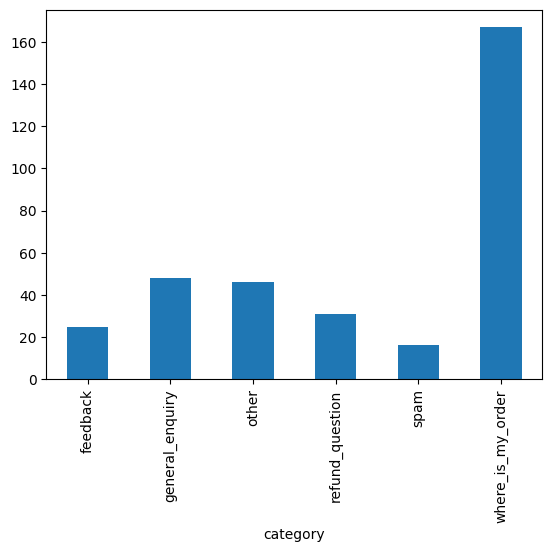

In [6]:
dataset.groupby(['category']).size().plot.bar()

In [7]:
list(dataset.category.unique())

['where_is_my_order',
 'other',
 'feedback',
 'general_enquiry',
 'refund_question',
 'spam']

In [8]:
# define label
labels = {
    'feedback' : 0,
    'general_enquiry' : 1,
    'other' : 2,
    'refund_question' : 3,
    'spam' : 4,
    'where_is_my_order' : 5
}

# convert category to label
def label_encoder(category:str) -> int :
    return labels[category]

# add label column with categorical-label mapping
dataset['label'] = dataset['category'].apply(lambda label: label_encoder(label))

# rename email column to question
dataset.rename(columns = {'email':'question'}, inplace = True)
dataset.head()

,category,question,label
0,where_is_my_order,"Hello, just checking in on the status of my or...",5
1,where_is_my_order,It's getting frustrating not knowing where my ...,5
2,other,"Hi there, I am organizing a charity event for ...",2
3,where_is_my_order,"Hey, I recently ordered a custom mechanical ke...",5
4,where_is_my_order,"Hello, I haven't received any updates regardin...",5


In [9]:
list(dataset['label'])

[5,
 5,
 2,
 5,
 5,
 0,
 5,
 5,
 1,
 5,
 2,
 5,
 5,
 1,
 1,
 3,
 1,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 0,
 1,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 3,
 3,
 5,
 0,
 3,
 5,
 5,
 5,
 5,
 0,
 4,
 5,
 4,
 5,
 2,
 5,
 2,
 5,
 5,
 5,
 2,
 0,
 3,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 0,
 0,
 5,
 2,
 5,
 5,
 5,
 1,
 4,
 5,
 2,
 0,
 5,
 2,
 3,
 1,
 5,
 4,
 4,
 5,
 5,
 3,
 2,
 2,
 5,
 3,
 5,
 2,
 5,
 2,
 5,
 5,
 5,
 5,
 0,
 2,
 1,
 1,
 1,
 1,
 4,
 5,
 5,
 4,
 1,
 5,
 1,
 1,
 0,
 0,
 5,
 1,
 5,
 5,
 2,
 5,
 5,
 2,
 5,
 0,
 1,
 5,
 1,
 5,
 0,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 2,
 5,
 1,
 5,
 5,
 5,
 0,
 5,
 3,
 5,
 5,
 1,
 2,
 5,
 3,
 3,
 2,
 5,
 5,
 1,
 1,
 5,
 5,
 1,
 2,
 5,
 2,
 4,
 0,
 5,
 2,
 4,
 5,
 4,
 1,
 2,
 5,
 5,
 1,
 5,
 1,
 5,
 5,
 4,
 3,
 5,
 1,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 2,
 2,
 5,
 2,
 5,
 5,
 3,
 1,
 1,
 5,
 5,
 5,
 2,
 5,
 5,
 2,
 5,
 1,
 5,
 4,
 2,
 1,
 5,
 5,
 0,
 5,
 0,
 2,
 3,
 5,
 2,
 5,
 5,
 3,
 5,
 5,
 3,
 4,
 5,
 5,
 1,
 5,
 2,
 5,
 1,
 0,
 5,
 2,
 1,
 5,
 5,
 5,
 1,
 5,
 5,
 5,


In [10]:
[labels[label] for label in dataset['category']]

[5,
 5,
 2,
 5,
 5,
 0,
 5,
 5,
 1,
 5,
 2,
 5,
 5,
 1,
 1,
 3,
 1,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 0,
 1,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 3,
 3,
 5,
 0,
 3,
 5,
 5,
 5,
 5,
 0,
 4,
 5,
 4,
 5,
 2,
 5,
 2,
 5,
 5,
 5,
 2,
 0,
 3,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 0,
 0,
 5,
 2,
 5,
 5,
 5,
 1,
 4,
 5,
 2,
 0,
 5,
 2,
 3,
 1,
 5,
 4,
 4,
 5,
 5,
 3,
 2,
 2,
 5,
 3,
 5,
 2,
 5,
 2,
 5,
 5,
 5,
 5,
 0,
 2,
 1,
 1,
 1,
 1,
 4,
 5,
 5,
 4,
 1,
 5,
 1,
 1,
 0,
 0,
 5,
 1,
 5,
 5,
 2,
 5,
 5,
 2,
 5,
 0,
 1,
 5,
 1,
 5,
 0,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 2,
 5,
 1,
 5,
 5,
 5,
 0,
 5,
 3,
 5,
 5,
 1,
 2,
 5,
 3,
 3,
 2,
 5,
 5,
 1,
 1,
 5,
 5,
 1,
 2,
 5,
 2,
 4,
 0,
 5,
 2,
 4,
 5,
 4,
 1,
 2,
 5,
 5,
 1,
 5,
 1,
 5,
 5,
 4,
 3,
 5,
 1,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 2,
 2,
 5,
 2,
 5,
 5,
 3,
 1,
 1,
 5,
 5,
 5,
 2,
 5,
 5,
 2,
 5,
 1,
 5,
 4,
 2,
 1,
 5,
 5,
 0,
 5,
 0,
 2,
 3,
 5,
 2,
 5,
 5,
 3,
 5,
 5,
 3,
 4,
 5,
 5,
 1,
 5,
 2,
 5,
 1,
 0,
 5,
 2,
 1,
 5,
 5,
 5,
 1,
 5,
 5,
 5,


# Split Dataset

split our dataframe into training, validation, and test set with the proportion of 80:10:10.

In [11]:
seed_number=1
np.random.seed(seed_number) # set same seed for keeping same result
df_train, df_val, df_test = np.split(dataset.sample(frac=1, random_state=seed_number),
                                     [int(.8*len(dataset)), int(.9*len(dataset))])

print(len(df_train),len(df_val), len(df_test))

266 33 34


In [12]:
from transformers import BertTokenizer
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = list(df['label'])
        self.texts = [tokenizer(text,
                                padding='max_length',
                                max_length = 512,
                                truncation=True,
                                return_tensors="pt")
                      for text in df['question']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [13]:
from torch import nn
from transformers import BertModel


class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, len(labels))
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [14]:
import gc
torch.cuda.empty_cache()
gc.collect()

50

In [15]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)

                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()

                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()

            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()

                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc

            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')

EPOCHS = 5
model = BertClassifier()
LR = 1e-6

train(model, df_train, df_val, LR, EPOCHS)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  0%|          | 0/133 [00:01<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 1.96 GiB total capacity; 1.40 GiB already allocated; 16.38 MiB free; 1.49 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF